In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import statistics

In [2]:
detail_df = pd.read_csv('./data/datasets/item_0/detail_list.csv', sep=',')
detail_df.head()

,id,name,category,brand,price,discount,discount_rate,mota,image_url,n_sold,rank,main_category,item index
0,2454355,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,Yomost,360000,0,0,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,2788.0,1.0,bach-hoa-online,14255
1,2454359,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,Yomost,360000,0,0,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,1591.0,9.0,bach-hoa-online,14257
2,2454353,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,Yomost,319000,41000,11,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,2186.0,7.0,bach-hoa-online,14254
3,98565212,Thùng 24 Lon Nước Ngọt Có Gaz Pepsi (320ml/lon),Bách Hóa Online/Đồ Uống Không Cồn/Đồ uống có g...,Pepsi,186000,2000,1,\nPepsi là nhãn hiệu nước giải khát hương Cola...,https://salt.tikicdn.com/cache/280x280/media/c...,1511.0,4.0,bach-hoa-online,19548
4,2454357,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,Yomost,360000,0,0,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,4535.0,8.0,bach-hoa-online,14256


In [3]:
detail_df.describe()

,id,price,discount,discount_rate,n_sold,rank,item index
count,1.967300e+04,1.967300e+04,1.967300e+04,19673.000000,18553.000000,12836.000000,19673.000000
mean,7.216649e+07,7.524248e+05,1.030933e+05,9.928176,509.208268,28.059520,9836.000000
std,4.045011e+07,2.958236e+06,7.152573e+05,16.550439,7864.627133,25.974031,5679.250259
min,5.589700e+04,1.000000e+03,0.000000e+00,0.000000,1.000000,1.000000,0.000000
25%,4.200687e+07,7.900000e+04,0.000000e+00,0.000000,10.000000,7.000000,4918.000000
50%,7.446005e+07,1.690000e+05,0.000000e+00,0.000000,47.000000,19.000000,9836.000000
75%,1.073663e+08,3.801500e+05,3.200000e+04,16.000000,217.000000,43.000000,14754.000000
max,1.505549e+08,1.000900e+08,5.096000e+07,91.000000,807078.000000,100.000000,19672.000000


In [4]:
detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19673 entries, 0 to 19672
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19673 non-null  int64  
 1   name           19673 non-null  object 
 2   category       19673 non-null  object 
 3   brand          19180 non-null  object 
 4   price          19673 non-null  int64  
 5   discount       19673 non-null  int64  
 6   discount_rate  19673 non-null  int64  
 7   mota           19671 non-null  object 
 8   image_url      19673 non-null  object 
 9   n_sold         18553 non-null  float64
 10  rank           12836 non-null  float64
 11  main_category  19673 non-null  object 
 12  item index     19673 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 2.0+ MB


In [5]:
detail_df['brand'].value_counts()

OEM                   8132
Xiaomi                 292
Samsung                202
Lock&Lock              142
YUUMY                  103
                      ... 
Premier Vinatissue       1
Eneloop                  1
HOÀNG LONG               1
Orikon                   1
Monkey Junior            1
Name: brand, Length: 2137, dtype: int64

In [6]:
detail_df['brand'] = detail_df['brand'].replace('\tOEM', 'OEM')
detail_df['brand'] = detail_df['brand'].replace(np.nan, 'OTHERS')
detail_df['brand'] = detail_df['brand'].apply(lambda x: x.upper())

In [7]:
detail_df.dtypes

id                 int64
name              object
category          object
brand             object
price              int64
discount           int64
discount_rate      int64
mota              object
image_url         object
n_sold           float64
rank             float64
main_category     object
item index         int64
dtype: object

In [8]:
item_quantity_per_brand = detail_df['brand'].value_counts()
item_quantity_per_brand

OEM              8222
OTHERS            494
XIAOMI            292
SAMSUNG           202
LOCK&LOCK         142
                 ... 
LANBEIBEI           1
BLITZWOLF           1
AIBECY              1
SCHNEIDER           1
MONKEY JUNIOR       1
Name: brand, Length: 2136, dtype: int64

In [9]:
brand_title = item_quantity_per_brand.index.tolist()
if '-1' in brand_title:
    brand_title[brand_title.index('-1')] = 'OTHERS';
brand_title[:5]

['OEM', 'OTHERS', 'XIAOMI', 'SAMSUNG', 'LOCK&LOCK']

Text(0, 0.5, 'Number of items manufactured per brand')

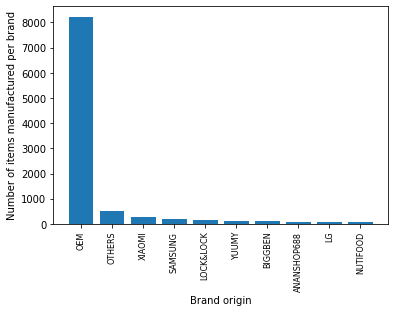

In [10]:
plt.bar(brand_title[:10], item_quantity_per_brand[:10])
plt.xticks(brand_title[:10], rotation=90, size=8)
plt.xlabel('Brand origin')
plt.ylabel('Number of items manufactured per brand')

In [11]:
average_price_and_count_per_brand = detail_df.groupby('brand')['price'].agg(['mean', 'count'])
print(type(average_price_and_count_per_brand))
average_price_and_count_per_brand

<class 'pandas.core.frame.DataFrame'>


,mean,count
brand,,
BRATECK,5.740000e+05,3
EIRMAI,1.079500e+06,2
EZVIZ,8.226492e+05,64
GAOMON,8.675000e+05,4
HARDEN,3.512500e+05,4
...,...,...
ĐẢO HẢI SẢN,1.616538e+05,26
ĐỒ CÂU 24H,9.000000e+04,2
ĐỒ DA CAO CẤP NHẤT TÍNH,1.850000e+05,1


In [12]:
brand_title = average_price_and_count_per_brand.sort_values(by='mean', ascending=False).index.tolist()
brand_title[:5]

['HONDA', 'APPLE', 'VINFAST', 'HITACHI', 'MITSUBISHI ELECTRIC']

In [13]:
average_price_per_brand = average_price_and_count_per_brand.sort_values(by='mean', ascending=False)['mean']
average_price_per_brand

brand
HONDA                           4.293992e+07
APPLE                           1.992210e+07
VINFAST                         1.990000e+07
HITACHI                         1.719378e+07
MITSUBISHI ELECTRIC             1.588233e+07
                                    ...     
333                             1.100000e+04
MUỐI THÀNH PHÁT                 8.000000e+03
PTA                             6.666667e+03
MUỐI IOD THÀNH PHÁT             6.000000e+03
XANHXINH.COM GREEN YOUR HOME    1.111000e+03
Name: mean, Length: 2136, dtype: float64

In [14]:
count_per_brand = average_price_and_count_per_brand.sort_values(by='count', ascending=False)['count']
count_per_brand

brand
OEM          8222
OTHERS        494
XIAOMI        292
SAMSUNG       202
LOCK&LOCK     142
             ... 
KINMAC          1
KINH ĐÔ         1
KINGS           1
KINGNUTS        1
ĐỨC             1
Name: count, Length: 2136, dtype: int64

C:\Users\Pc\AppData\Local\Temp/ipykernel_544/3146660454.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation=90, size=10)


Text(0, 0.5, 'Number of items oer brand')

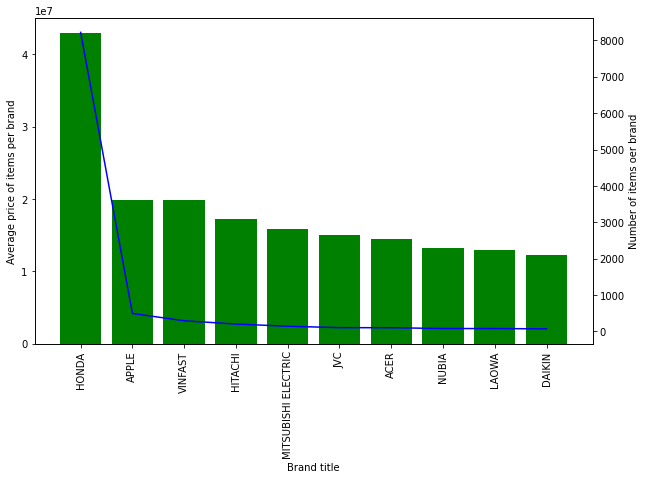

In [15]:
x = brand_title[:10]
y1 = average_price_per_brand[:10]
y2 = count_per_brand[:10]

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)
ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(x, rotation=90, size=10)
ax1.set_xlabel('Brand title')
ax1.set_ylabel('Average price of items per brand')
ax2.set_ylabel('Number of items oer brand')

In [16]:
detail_df.head(3)

,id,name,category,brand,price,discount,discount_rate,mota,image_url,n_sold,rank,main_category,item index
0,2454355,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,YOMOST,360000,0,0,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,2788.0,1.0,bach-hoa-online,14255
1,2454359,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,YOMOST,360000,0,0,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,1591.0,9.0,bach-hoa-online,14257
2,2454353,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,YOMOST,319000,41000,11,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,2186.0,7.0,bach-hoa-online,14254


In [17]:
detail_df['category'].value_counts()

Túi thời trang nam/Túi đeo chéo nam                                        525
Túi thời trang nữ/Túi đeo chéo, túi đeo vai nữ/Túi đeo chéo dạo phố        455
Balo và Vali/Balo/Balo nữ                                                  341
Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP                          271
Túi thời trang nam/Ví nam/Ví nam ngang                                     256
                                                                          ... 
Hàng Quốc Tế/Thiết Bị Số - Phụ Kiện Số/Màn hình & miếng dán màn hình         1
Hàng Quốc Tế/Thời Trang/Trang Sức                                            1
Hàng Quốc Tế/Thiết Bị Số - Phụ Kiện Số/Máy nghe nhạc                         1
Hàng Quốc Tế/Làm Đẹp - Sức Khỏe/Chăm sóc tóc và da đầu/Dưỡng tóc, ủ tóc      1
Hàng Quốc Tế/Làm Đẹp - Sức Khỏe/Nước hoa                                     1
Name: category, Length: 1216, dtype: int64

In [18]:
ratings = pd.read_csv('./data/datasets/rating_0/rating_list.csv', sep=',')
ratings.head(5)

,user_id,item_id,rating,timestamp,comment,item index,user index
0,12134826,2454355,1,1638029440,"Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ...",14255,276534
1,10165696,2454355,5,1629035160,sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...,14255,97208
2,10165696,2454357,5,1629035212,"ngon, tuyệt, rẻ",14256,97208
3,11264068,2454355,2,1589629724,"sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa...",14255,333469
4,16720563,2454355,1,1595313777,"tiki làm việc tắc trách, tôi mua sữa yom...",14255,333468


In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752838 entries, 0 to 752837
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     752838 non-null  int64 
 1   item_id     752838 non-null  int64 
 2   rating      752838 non-null  int64 
 3   timestamp   752838 non-null  int64 
 4   comment     474702 non-null  object
 5   item index  752838 non-null  int64 
 6   user index  752838 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 40.2+ MB


In [20]:
ratings.describe()

,user_id,item_id,rating,timestamp,item index,user index
count,7.528380e+05,7.528380e+05,752838.000000,7.528380e+05,752838.000000,752838.000000
mean,1.176346e+07,5.690426e+07,4.394061,1.621182e+09,9825.399870,146662.089460
std,7.396624e+06,3.745312e+07,1.146588,1.959157e+07,5656.378275,138150.689656
min,1.000000e+01,5.589700e+04,1.000000,1.396550e+09,0.000000,0.000000
25%,6.247126e+06,2.197374e+07,4.000000,1.612607e+09,4864.000000,24184.000000
50%,1.163033e+07,5.649009e+07,5.000000,1.626765e+09,9849.000000,97882.000000
75%,1.791645e+07,8.224175e+07,5.000000,1.635481e+09,14686.000000,259109.750000
max,2.619862e+07,1.505549e+08,5.000000,1.640531e+09,19672.000000,447319.000000


In [21]:
ratings = ratings[ratings['rating'] >= 0]

In [22]:
ratings.drop_duplicates(subset=['user_id', 'item_id', 'comment'], keep='first', inplace=True)
ratings.drop_duplicates(subset=['user_id', 'item_id', 'timestamp'], keep='first', inplace=True)

In [23]:
overalls = pd.read_csv('./data/datasets/item_0/overall_list.csv', sep=',', encoding='utf-8')
overalls.head()

,id,avg_rating,n_reviews,n_rate_5,n_rate_4,n_rate_3,n_rate_2,n_rate_1,rate_with_img,item index
0,2454355,4.7,365,309,38,4,4,10,60,14255
1,2454359,4.8,432,383,26,11,2,10,58,14257
2,2454353,4.8,367,324,25,6,2,10,60,14254
3,98565212,4.7,276,240,15,5,3,13,49,19548
4,2454357,4.8,511,462,31,5,6,7,50,14256


In [24]:
average_item_ratings = ratings.groupby('item_id').mean()['rating']
real_average_item_ratings = overalls[['id', 'avg_rating']]

In [25]:
average_item_ratings = average_item_ratings.sort_values(ascending=False)
average_item_ratings = average_item_ratings.to_frame()
average_item_ratings

,rating
item_id,
150554942,5.0
102100683,5.0
102485503,5.0
102471633,5.0
102471567,5.0
...,...
117406431,1.0
122911157,1.0
117393233,1.0


In [26]:
star_on_5_average = len(average_item_ratings[average_item_ratings['rating'] == 5.0])
star_on_4_to_5_average = len(average_item_ratings[(average_item_ratings['rating'] >= 3.0) & 
                                                (average_item_ratings['rating'] < 4.0)])
star_on_3_to_4_average = len(average_item_ratings[(average_item_ratings['rating'] >= 3.0) & 
                                                (average_item_ratings['rating'] < 4.0)])
star_on_2_to_3_average = len(average_item_ratings[(average_item_ratings['rating'] >= 2.0 ) & 
                                                (average_item_ratings['rating'] < 3.0)])
star_on_1_to_2_average = len(average_item_ratings[(average_item_ratings['rating'] >= 1.0) & 
                                                (average_item_ratings['rating'] < 2)])

real_star_on_5_average = len(real_average_item_ratings[real_average_item_ratings['avg_rating'] == 5.0])
real_star_on_4_to_5_average = len(real_average_item_ratings[(real_average_item_ratings['avg_rating'] >= 3.0) & 
                                                (real_average_item_ratings['avg_rating'] < 4.0)])
real_star_on_3_to_4_average = len(real_average_item_ratings[(real_average_item_ratings['avg_rating'] >= 3.0) & 
                                                (real_average_item_ratings['avg_rating'] < 4.0)])
real_star_on_2_to_3_average = len(real_average_item_ratings[(real_average_item_ratings['avg_rating'] >= 2.0 ) & 
                                                (real_average_item_ratings['avg_rating'] < 3.0)])
real_star_on_1_to_2_average = len(real_average_item_ratings[(real_average_item_ratings['avg_rating'] >= 1.0) & 
                                                (real_average_item_ratings['avg_rating'] < 2)])


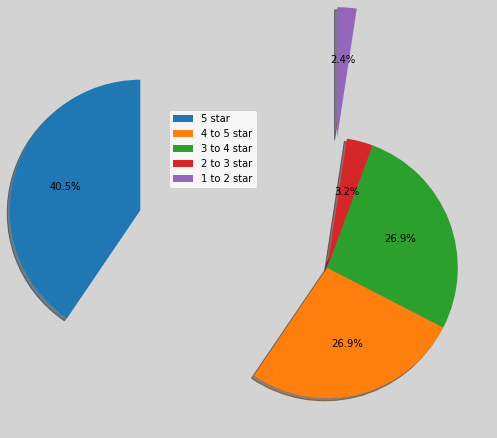

In [27]:
labels =  ['5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star']
nums = [star_on_5_average, star_on_4_to_5_average, star_on_3_to_4_average, star_on_2_to_3_average, star_on_1_to_2_average]

fig, ax = plt.subplots()
fig.set_facecolor('lightgrey')
fig.set_size_inches(10, 6)
explode = (1.5, 0, 0, 0, 1)
patches, texts, auto = ax.pie(nums, shadow=True, startangle=90, explode=explode, autopct="%.1f%%")
plt.legend(patches, labels, loc="best")


Text(0.5, 0.5, "My Dataset's Rating Distribution And Real On Tiki Website")

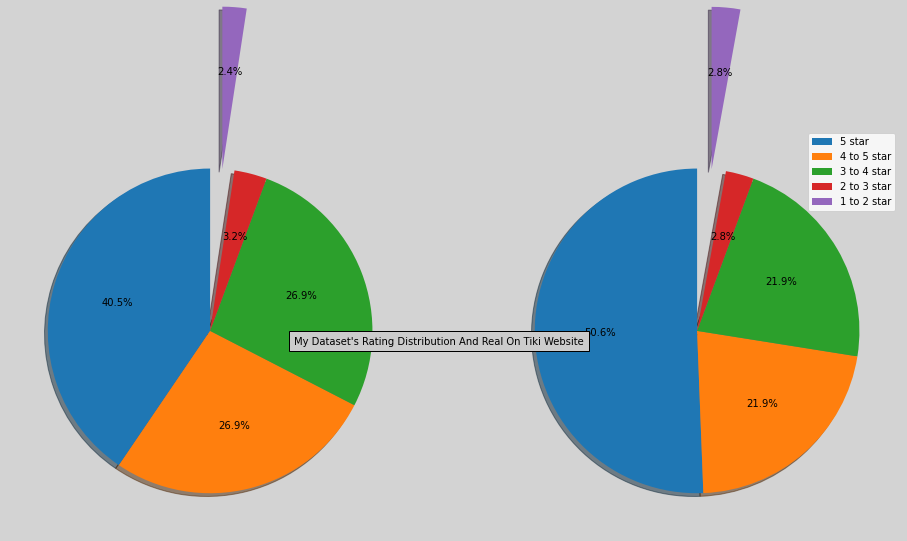

In [28]:
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 30)
fig.set_facecolor('lightgrey')

labels =  ['5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star']
explode1 = (0, 0, 0, 0, 1)

nums = [star_on_5_average, star_on_4_to_5_average, star_on_3_to_4_average, star_on_2_to_3_average, star_on_1_to_2_average]
ax1.pie(nums, shadow=True, startangle=90, explode=explode1, autopct="%.1f%%")

explode2 = (0, 0, 0, 0, 1)
nums = [real_star_on_5_average, real_star_on_4_to_5_average, real_star_on_3_to_4_average, real_star_on_2_to_3_average, real_star_on_1_to_2_average]
ax2.pie(nums, shadow=True, startangle=90, explode=explode2, autopct="%.1f%%")

plt.legend(labels, loc="best")
plt.figtext(0.5, 0.5, 'My Dataset\'s Rating Distribution And Real On Tiki Website', ha='center', va='top', bbox={'facecolor':'0.8', 'pad':5})


In [29]:
reliable_items = pd.merge(overalls, detail_df[['id', 'n_sold']], how='inner', left_on='id', right_on='id')
reliable_items

,id,avg_rating,n_reviews,n_rate_5,n_rate_4,n_rate_3,n_rate_2,n_rate_1,rate_with_img,item index,n_sold
0,2454355,4.7,365,309,38,4,4,10,60,14255,2788.0
1,2454359,4.8,432,383,26,11,2,10,58,14257,1591.0
2,2454353,4.8,367,324,25,6,2,10,60,14254,2186.0
3,98565212,4.7,276,240,15,5,3,13,49,19548,1511.0
4,2454357,4.8,511,462,31,5,6,7,50,14256,4535.0
...,...,...,...,...,...,...,...,...,...,...,...
19668,4060823,5.0,3,3,0,0,0,0,3,19317,24.0
19669,99344964,5.0,1,1,0,0,0,0,0,18545,2.0
19670,56246498,3.0,2,1,0,0,0,1,0,2493,8.0
19671,10075988,2.8,5,2,0,0,1,2,0,17130,66.0


In [30]:
reliable_items['n_sold'] = reliable_items['n_sold'].replace(np.nan, 0)

In [31]:
no_sold_up_10000 = len(reliable_items[reliable_items['n_sold'] >= 10000])
no_sold_from_5000_to_10000 = len(reliable_items[(reliable_items['n_sold'] >= 5000) & 
                                                (reliable_items['n_sold'] < 10000)])
no_sold_from_2000_to_5000 = len(reliable_items[(reliable_items['n_sold'] >= 2000) & 
                                                (reliable_items['n_sold'] < 5000)])
no_sold_from_1000_to_2000 = len(reliable_items[(reliable_items['n_sold'] >= 1000 ) & 
                                                (reliable_items['n_sold'] < 2000)])
no_sold_from_500_to_1000 = len(reliable_items[(reliable_items['n_sold'] >= 500 ) & 
                                                (reliable_items['n_sold'] < 1000)])
no_sold_from_200_to_500 = len(reliable_items[(reliable_items['n_sold'] >= 200 ) & 
                                                (reliable_items['n_sold'] < 500)])

no_sold_below_200 = len(reliable_items[reliable_items['n_sold'] < 200])


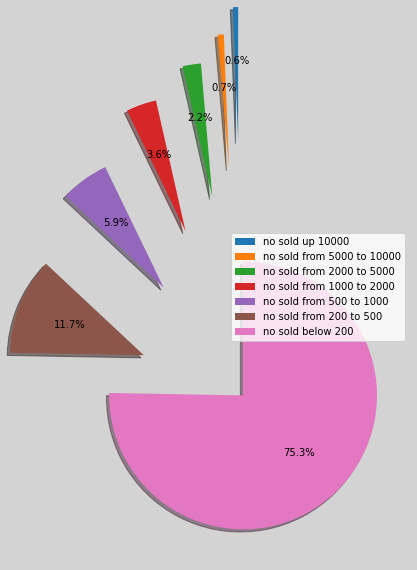

In [32]:
labels =  ['no sold up 10000', 'no sold from 5000 to 10000', 'no sold from 2000 to 5000', 'no sold from 1000 to 2000', 'no sold from 500 to 1000', 'no sold from 200 to 500', 'no sold below 200']
nums = [no_sold_up_10000, no_sold_from_5000_to_10000, no_sold_from_2000_to_5000, no_sold_from_1000_to_2000, no_sold_from_500_to_1000, no_sold_from_200_to_500, no_sold_below_200]

fig, ax = plt.subplots()
fig.set_facecolor('lightgrey')
fig.set_size_inches(6, 10)
explode = (1.9, 1.7, 1.5, 1.3, 1, 0.8, 0)
patches, texts, auto = ax.pie(nums, shadow=True, startangle=90, explode=explode, autopct="%.1f%%")
plt.legend(patches, labels, loc="best")


In [33]:
overalls.head()

,id,avg_rating,n_reviews,n_rate_5,n_rate_4,n_rate_3,n_rate_2,n_rate_1,rate_with_img,item index
0,2454355,4.7,365,309,38,4,4,10,60,14255
1,2454359,4.8,432,383,26,11,2,10,58,14257
2,2454353,4.8,367,324,25,6,2,10,60,14254
3,98565212,4.7,276,240,15,5,3,13,49,19548
4,2454357,4.8,511,462,31,5,6,7,50,14256


In [34]:
highest_reliable_items = reliable_items[(reliable_items['n_sold'] >= 1000) & (reliable_items['avg_rating'] == 5)]
print("Tiki suggestion should suggest to new users films that are not only highly rated but also bought by many users")
highest_reliable_items

Tiki suggestion should suggest to new users films that are not only highly rated but also bought by many users


,id,avg_rating,n_reviews,n_rate_5,n_rate_4,n_rate_3,n_rate_2,n_rate_1,rate_with_img,item index,n_sold
2368,120450353,5.0,29,28,1,0,0,0,2,18977,1203.0
11868,76198706,5.0,520,505,14,0,0,1,65,7025,2188.0
11870,97957586,5.0,308,300,6,1,0,1,53,7167,1146.0
11918,105708113,5.0,145,144,1,0,0,0,3,9722,1505.0
16939,137119597,5.0,8,8,0,0,0,0,0,2779,1292.0
18181,68267266,5.0,1295,1266,12,9,2,6,20,16426,1029.0
19306,136260596,5.0,2,2,0,0,0,0,0,11568,1024.0
19432,141792503,5.0,1,1,0,0,0,0,0,15506,6680.0


In [35]:
categories = detail_df['category'].value_counts().index.tolist()
print(len(categories))
categories[:10]

1216


['Túi thời trang nam/Túi đeo chéo nam',
 'Túi thời trang nữ/Túi đeo chéo, túi đeo vai nữ/Túi đeo chéo dạo phố',
 'Balo và Vali/Balo/Balo nữ',
 'Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP',
 'Túi thời trang nam/Ví nam/Ví nam ngang',
 'Đồng hồ và Trang sức/Trang sức/Vòng tay',
 'Giày - Dép nam/Dép nam/Dép nam quai ngang',
 'Giày - Dép nam/Giày thể thao nam/Giày thể thao nam cổ thấp',
 'Túi thời trang nữ/Ví nữ/Ví ngắn',
 'Balo và Vali/Balo, cặp, túi chống sốc laptop/Túi chống sốc']

In [36]:
n = detail_df.shape[0]
detail_categories = {}
for i in range(n):
    cates = detail_df.iloc[i]['category']
    cates = cates.split("/")
    for cate in cates:
        if cate in detail_categories:
            detail_categories.update({cate: detail_categories[cate] + 1})
        else:
            detail_categories.update({cate: 1})

detail_categories


{'Bách Hóa Online': 1039,
 'Sữa và các Sản phẩm từ sữa': 187,
 'Sữa nước': 169,
 'Sữa Chua Uống & Ăn': 27,
 'Đồ Uống Không Cồn': 61,
 'Đồ uống có gas': 41,
 'Nước Ngọt': 29,
 'Thực phẩm Đóng hộp và Khô': 155,
 'Thực phẩm khô': 155,
 'Thực phẩm khô khác': 21,
 'Đồ uống - Pha chế dạng bột': 96,
 'Cà phê': 113,
 'Đặc sản Việt Nam': 13,
 'Thực phẩm': 51,
 'Đồ uống có cồn': 51,
 'Bia và Nước hoa quả lên men': 39,
 'Bia Nội Địa': 28,
 'Đồ uống không gas': 22,
 'Trà Uống Liền': 6,
 'Sữa Thực Vật': 39,
 'Thực phẩm ăn liền': 95,
 'Sữa tiệt trùng (UHT)': 79,
 'Đồ uống - Pha chế': 100,
 'Ngũ cốc, bột': 41,
 'Đồ Ăn Vặt': 50,
 'Các Loại Đồ Ăn Vặt Khác': 2,
 'Nước Tăng Lực': 11,
 'Gia Vị và Chế Biến': 111,
 'Dầu ăn': 17,
 'Các loại dầu khác': 6,
 'Bánh': 61,
 'Đậu & Hạt Các Loại': 80,
 'Hạt, củ, quả khô': 80,
 'Dầu thực vật': 9,
 'Đồ hộp': 11,
 'Cá hộp': 2,
 'Chăm sóc nhà cửa': 231,
 'Vệ sinh nhà cửa': 63,
 'Khử mùi, sáp thơm': 13,
 'Gạo, nếp': 23,
 'Thực phẩm khác': 35,
 'Thực phẩm bổ dưỡng': 27,
 

In [37]:
detail_categories = dict(sorted(detail_categories.items(), key=lambda item: item[1], reverse=True))
detail_categories

{'Nhà Cửa - Đời Sống': 1312,
 'Máy Ảnh - Máy Quay Phim': 1098,
 'Thời trang nam': 1058,
 'Hàng Quốc Tế': 1055,
 'Balo và Vali': 1054,
 'Laptop - Máy Vi Tính - Linh kiện': 1053,
 'Điện Tử - Điện Lạnh': 1051,
 'Đồng hồ và Trang sức': 1051,
 'Túi thời trang nữ': 1051,
 'Túi thời trang nam': 1050,
 'Giày - Dép nữ': 1048,
 'Thể Thao - Dã Ngoại': 1048,
 'Phụ kiện thời trang': 1046,
 'Giày - Dép nam': 1041,
 'Bách Hóa Online': 1039,
 'TIKINGON': 855,
 'Thiết Bị Số - Phụ Kiện Số': 846,
 'Đồ Chơi - Mẹ & Bé': 823,
 'Trang sức': 631,
 'Balo': 539,
 'Túi đeo chéo nam': 525,
 'Phụ kiện thời trang nữ': 503,
 'Túi đeo chéo, túi đeo vai nữ': 486,
 'Âm thanh & Phụ kiện Tivi': 478,
 'Túi đeo chéo dạo phố': 455,
 'Voucher - Dịch vụ': 447,
 'Phụ Kiện Máy Ảnh, Máy Quay': 427,
 'Ví nam': 390,
 'Camera Giám Sát': 348,
 'Balo nữ': 341,
 'Mắt kính': 340,
 'Dụng cụ - thiết bị tập thể thao': 336,
 'Điện Thoại - Máy Tính Bảng': 325,
 'Thiết Bị Văn Phòng - Thiết Bị Ngoại Vi': 322,
 'Dép - Guốc nữ': 321,
 'Ví nữ': 

In [38]:
categories = list(detail_categories.keys())
count_item_per_category = list(detail_categories.values())

Text(0, 0.5, 'Number of tags assgined per category')

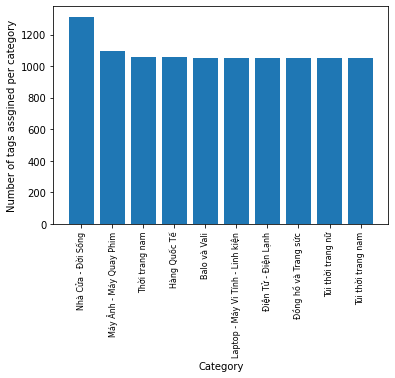

In [39]:
plt.bar(categories[:10], count_item_per_category[:10])
plt.xticks(categories[:10], rotation=90, size=8)
plt.xlabel('Category')
plt.ylabel('Number of tags assgined per category')

In [40]:
ratings

,user_id,item_id,rating,timestamp,comment,item index,user index
0,12134826,2454355,1,1638029440,"Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ...",14255,276534
1,10165696,2454355,5,1629035160,sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...,14255,97208
2,10165696,2454357,5,1629035212,"ngon, tuyệt, rẻ",14256,97208
3,11264068,2454355,2,1589629724,"sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa...",14255,333469
4,16720563,2454355,1,1595313777,"tiki làm việc tắc trách, tôi mua sữa yom...",14255,333468
...,...,...,...,...,...,...,...
752833,2148138,7816029,5,1590119914,"chị chủ spa rất nhiệt tình, không gian yên tĩn...",12454,168897
752834,8821274,7816029,5,1544444322,dịch vụ rất ok. Đáng để trải nghiệm. Nhân viên...,12454,168876
752835,22669147,99344964,5,1630391570,NaN,18545,168884
752836,8548260,56246498,1,1628907871,Mình vừa đặt hàng đã nhận được đâu mà ghi giao...,2493,168885


In [41]:
def timestamp_to_hour(timestamp):
    return datetime.fromtimestamp(timestamp).strftime("%H")

def timestamp_to_date(timestamp):
    return datetime.fromtimestamp(timestamp).strftime("%A")

In [42]:
ratings['Hour'] = ratings['timestamp'].apply(timestamp_to_hour)
ratings['Date'] = ratings['timestamp'].apply(timestamp_to_date)
ratings.head()

,user_id,item_id,rating,timestamp,comment,item index,user index,Hour,Date
0,12134826,2454355,1,1638029440,"Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ...",14255,276534,23,Saturday
1,10165696,2454355,5,1629035160,sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...,14255,97208,20,Sunday
2,10165696,2454357,5,1629035212,"ngon, tuyệt, rẻ",14256,97208,20,Sunday
3,11264068,2454355,2,1589629724,"sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa...",14255,333469,18,Saturday
4,16720563,2454355,1,1595313777,"tiki làm việc tắc trách, tôi mua sữa yom...",14255,333468,13,Tuesday


In [43]:
order_quantity_per_hour = ratings.groupby('Hour')['item_id'].agg(['count'])
print(type(order_quantity_per_hour))
order_quantity_per_hour.head()

<class 'pandas.core.frame.DataFrame'>


,count
Hour,
00,12818
01,6666
02,3804
03,2529
04,2525


In [44]:
#order_quantity_per_hour_title = order_quantity_per_hour.sort_values(by='count', ascending=False).index.tolist()
order_quantity_per_hour_title = order_quantity_per_hour.index.tolist()
order_quantity_per_hour_title[:10]

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']

In [45]:
#order_quantity_per_hour_value = order_quantity_per_hour.sort_values(by='count', ascending=False)['count'].tolist()
order_quantity_per_hour_value = order_quantity_per_hour['count'].tolist()
order_quantity_per_hour_value[:10]

[12818, 6666, 3804, 2529, 2525, 5169, 10803, 18210, 28874, 42062]

Text(0, 0.5, 'Number of orders bought per hour')

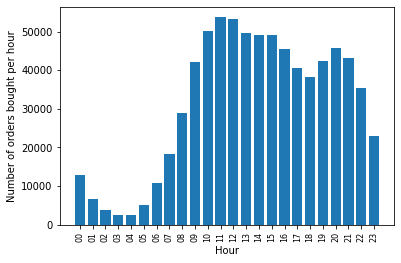

In [46]:
plt.bar(order_quantity_per_hour_title, order_quantity_per_hour_value)
plt.xticks(order_quantity_per_hour_title, rotation=90, size=8)
plt.xlabel('Hour')
plt.ylabel('Number of orders bought per hour')

In [47]:
order_quantity_per_day = ratings.groupby('Date')['item_id'].agg(['count'])
print(type(order_quantity_per_day))
order_quantity_per_day.head()

<class 'pandas.core.frame.DataFrame'>


,count
Date,
Friday,108674
Monday,108287
Saturday,104007
Sunday,104489
Thursday,107613


In [48]:
#order_quantity_per_day_title = order_quantity_per_day.sort_values(by='count', ascending=False).index.tolist()
order_quantity_per_day_title = order_quantity_per_day.index.tolist()
order_quantity_per_day_title[:10]

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [49]:
#order_quantity_per_day_value = order_quantity_per_day.sort_values(by='count', ascending=False)['count'].tolist()
order_quantity_per_day_value = order_quantity_per_day['count'].tolist()
order_quantity_per_day_value[:10]

[108674, 108287, 104007, 104489, 107613, 111077, 108691]

Text(0, 0.5, 'Number of orders bought per weekday and weekend')

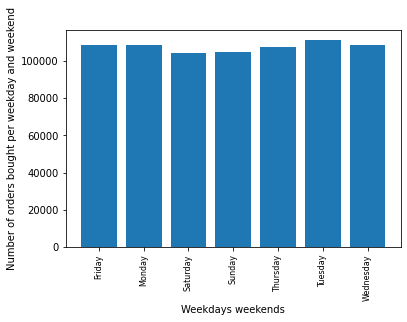

In [50]:
plt.bar(order_quantity_per_day_title, order_quantity_per_day_value)
plt.xticks(order_quantity_per_day_title, rotation=90, size=8)
plt.xlabel('Weekdays weekends')
plt.ylabel('Number of orders bought per weekday and weekend')

In [51]:
ratings.head()

,user_id,item_id,rating,timestamp,comment,item index,user index,Hour,Date
0,12134826,2454355,1,1638029440,"Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ...",14255,276534,23,Saturday
1,10165696,2454355,5,1629035160,sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...,14255,97208,20,Sunday
2,10165696,2454357,5,1629035212,"ngon, tuyệt, rẻ",14256,97208,20,Sunday
3,11264068,2454355,2,1589629724,"sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa...",14255,333469,18,Saturday
4,16720563,2454355,1,1595313777,"tiki làm việc tắc trách, tôi mua sữa yom...",14255,333468,13,Tuesday


In [52]:
df = pd.merge(detail_df, ratings, how='inner', left_on="id", right_on="item_id")
df = df.drop(columns=['item_id'])

In [53]:
df = pd.merge(df, overalls, how='inner', on='id')

In [54]:
cates = df['main_category'].value_counts().index.tolist()
no = df['main_category'].value_counts().tolist()

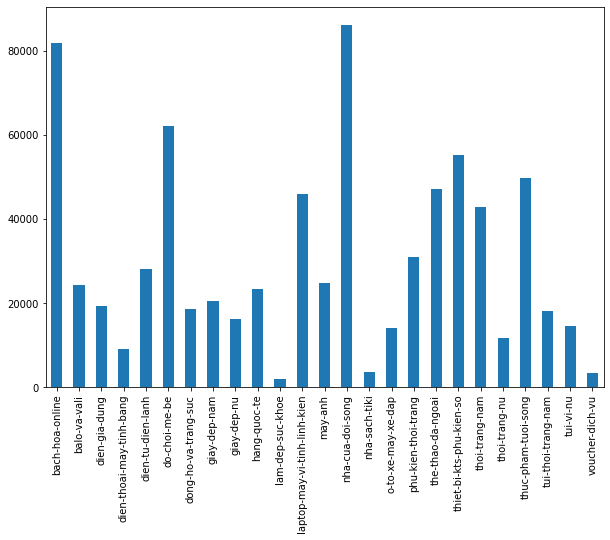

In [55]:
plt.figure(figsize=(10,7))
df['main_category'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [56]:
bach_hoa_online_stars = df[df['main_category'] == 'bach-hoa-online']['avg_rating']
lam_dep_suc_khoe_stars = df[df['main_category'] == 'lam-dep-suc-khoe']['avg_rating']
nha_cua_doi_song_stars = df[df['main_category'] == 'nha-cua-doi-song']['avg_rating']

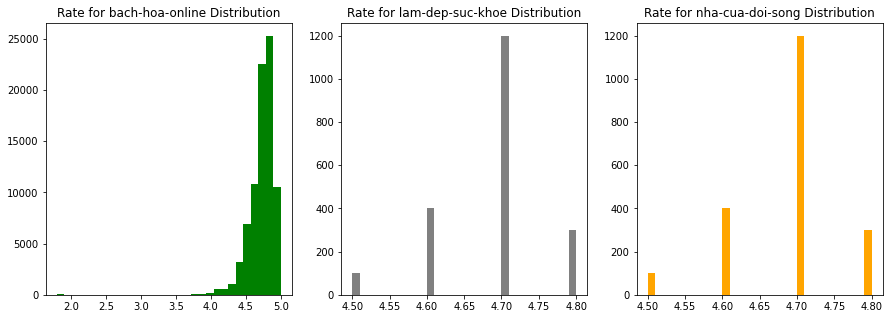

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].hist(x=bach_hoa_online_stars, bins=30, color = 'g')
ax[0].title.set_text('Rate for bach-hoa-online Distribution')

ax[1].hist(x=lam_dep_suc_khoe_stars, bins=30, color = 'grey')
ax[1].title.set_text('Rate for lam-dep-suc-khoe Distribution')


ax[2].hist(x=lam_dep_suc_khoe_stars, bins=30, color = 'orange')
ax[2].title.set_text('Rate for nha-cua-doi-song Distribution')

plt.show()

In [58]:
lavene_test = stats.levene(bach_hoa_online_stars, lam_dep_suc_khoe_stars)

print('pvalue for equal variance: ', lavene_test[1])
print('Variance of bowl rate', statistics.variance(bach_hoa_online_stars))
print('Variance of cup rate', statistics.variance(lam_dep_suc_khoe_stars))
print('Var bowl / Var cup', statistics.variance(bach_hoa_online_stars)/statistics.variance(lam_dep_suc_khoe_stars))

pvalue for equal variance:  2.4775518843812544e-136
Variance of bowl rate 0.03151460206627066
Variance of cup rate 0.005278714665184158
Var bowl / Var cup 5.970127969622168
